#### _Checking the accuracy scores of the algorithms in comparison with the original dataset_ 

# 1. CNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [2]:
aadershi_dir = 'data_blur/Aadershi'
akshay_dir = 'data_blur/Akshay'
ayush_dir = 'data_blur/Ayush'
daivik_dir = 'data_blur/Daivik'
mayank_dir = 'data_blur/Mayank'
payal_dir = 'data_blur/Payal'
yashi_dir = 'data_blur/Yashi'
yogesh_dir = 'data_blur/Yogesh'

aadershi_files = os.listdir(aadershi_dir)
akshay_files = os.listdir(akshay_dir)
ayush_files = os.listdir(ayush_dir)
daivik_files = os.listdir(daivik_dir)
mayank_files = os.listdir(mayank_dir)
payal_files = os.listdir(payal_dir)
yashi_files = os.listdir(yashi_dir)
yogesh_files = os.listdir(yogesh_dir)

print("First few aadershi files:")
print(aadershi_files[:5])

print("First few akshay files:")
print(akshay_files[:5])

print("First few ayush files:")
print(ayush_files[:5])

print("First few daivik files:")
print(daivik_files[:5])

print("First few mayank files:")
print(mayank_files[:5])

print("First few payal files:")
print(payal_files[:5])

print("First few yashi files:")
print(yashi_files[:5])

print("First few yogesh files:")
print(yogesh_files[:5])

First few aadershi files:
['Aadershi_1.jpg', 'Aadershi_10.jpg', 'Aadershi_100.jpg', 'Aadershi_101.jpg', 'Aadershi_102.jpg']
First few akshay files:
['Akshay_1.jpg', 'Akshay_10.jpg', 'Akshay_100.jpg', 'Akshay_101.jpg', 'Akshay_102.jpg']
First few ayush files:
['Ayush_1.jpg', 'Ayush_10.jpg', 'Ayush_100.jpg', 'Ayush_101.jpg', 'Ayush_102.jpg']
First few daivik files:
['Daivik_1.jpg', 'Daivik_10.jpg', 'Daivik_100.jpg', 'Daivik_101.jpg', 'Daivik_102.jpg']
First few mayank files:
['Mayank_1.jpg', 'Mayank_10.jpg', 'Mayank_100.jpg', 'Mayank_101.jpg', 'Mayank_102.jpg']
First few payal files:
['Payal_1.jpg', 'Payal_10.jpg', 'Payal_100.jpg', 'Payal_101.jpg', 'Payal_102.jpg']
First few yashi files:
['Yashi_1.jpg', 'Yashi_10.jpg', 'Yashi_100.jpg', 'Yashi_101.jpg', 'Yashi_102.jpg']
First few yogesh files:
['Yogesh_1.jpg', 'Yogesh_10.jpg', 'Yogesh_100.jpg', 'Yogesh_101.jpg', 'Yogesh_102.jpg']


In [34]:
input_path = []   
label = []        

for class_name in os.listdir('data_blur'):
    for path in os.listdir('data_blur/'+class_name):
        if class_name == 'Aadershi':
            label.append(0)
        elif class_name == 'Akshay':
            label.append(1)
        elif class_name == 'Ayush':
            label.append(2)
        elif class_name == 'Daivik':
            label.append(3)
        elif class_name == 'Mayank':
            label.append(4)
        elif class_name == 'Payal':
            label.append(5)
        elif class_name == 'Yashi':
            label.append(6)
        elif class_name == 'Yogesh':
            label.append(7)
        input_path.append(os.path.join('data_blur',class_name,path))
print(input_path[0], label[0])


data_blur\Aadershi\Aadershi_1.jpg 0


In [37]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)  # shufling the dataset
df.head()

,images,label
0,data_blur\Daivik\Daivik_103.jpg,3
1,data_blur\Mayank\Mayank_196.jpg,4
2,data_blur\Mayank\Mayank_183.jpg,4
3,data_blur\Yashi\Yashi_141.jpg,6
4,data_blur\Mayank\Mayank_25.jpg,4


In [38]:
# Checking if all files are in correct form
for i in df['images']:
    if '.jpg' not in i:
        print(i)

In [39]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

[]

In [40]:
df['label'].value_counts()

3    200
4    200
6    200
0    200
2    200
7    200
1    200
5    200
Name: label, dtype: int64

In [41]:
df['label'] = df['label'].astype('str')

In [42]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(df['images'], df['label'], stratify=df['label'], test_size=0.2, random_state=42)

In [43]:
print(X_train.shape, x_test.shape, Y_train.shape, y_test.shape)

(1280,) (320,) (1280,) (320,)


In [44]:
train_df = pd.DataFrame({'images': X_train, 'label': Y_train})
test_df = pd.DataFrame({"images": x_test, 'label': y_test})

In [45]:
print(train_df.shape)
print(test_df.shape)

(1280, 2)
(320, 2)


In [46]:
train_df.head()

,images,label
656,data_blur\Aadershi\Aadershi_68.jpg,0
715,data_blur\Ayush\Ayush_114.jpg,2
318,data_blur\Mayank\Mayank_47.jpg,4
1343,data_blur\Yashi\Yashi_37.jpg,6
1175,data_blur\Ayush\Ayush_165.jpg,2


In [47]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 45,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale= 1./255)

train_iterator = train_generator.flow_from_dataframe(train_df,
                                                     x_col='images',
                                                     y_col='label',
                                                     target_size=(128,128),
                                                     batch_size=8,
                                                     class_mode='categorical',
                                                     shuffle = True
)

val_iterator = val_generator.flow_from_dataframe(
    test_df,
    x_col = 'images',
    y_col = 'label',
    target_size = (128, 128),
    batch_size=8,
    class_mode = 'categorical',
    shuffle = True
)

Found 1280 validated image filenames belonging to 8 classes.
Found 320 validated image filenames belonging to 8 classes.


In [51]:
from keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define Early Stopping
early_stopping = EarlyStopping(monitor='accuracy', patience=3, verbose=1, restore_best_weights=True)

# Define ModelCheckpoint to save the best model based on validation accuracy
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='accuracy', mode='max', verbose=1)

# Create a list of callbacks
callbacks = [early_stopping, model_checkpoint]


model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPool2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(8, activation='softmax')  # sigmoid for binary class classification
])

In [52]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 64)       

In [53]:
history = model.fit(train_iterator, epochs=100, validation_data = val_iterator, callbacks=callbacks )

Epoch 1/100
160/160 [==============================] - ETA: 0s - loss: 1.2670 - accuracy: 0.5266
Epoch 1: accuracy improved from -inf to 0.52656, saving model to best_model.h5
160/160 [==============================] - 20s 118ms/step - loss: 1.2670 - accuracy: 0.5266 - val_loss: 0.2294 - val_accuracy: 0.9250
Epoch 2/100
160/160 [==============================] - ETA: 0s - loss: 0.3227 - accuracy: 0.8875
Epoch 2: accuracy improved from 0.52656 to 0.88750, saving model to best_model.h5
160/160 [==============================] - 19s 120ms/step - loss: 0.3227 - accuracy: 0.8875 - val_loss: 0.1569 - val_accuracy: 0.9438
Epoch 3/100
160/160 [==============================] - ETA: 0s - loss: 0.2221 - accuracy: 0.9289
Epoch 3: accuracy improved from 0.88750 to 0.92891, saving model to best_model.h5
160/160 [==============================] - 19s 119ms/step - loss: 0.2221 - accuracy: 0.9289 - val_loss: 0.1511 - val_accuracy: 0.9406
Epoch 4/100
160/160 [==============================] - ETA: 0s -

In [54]:
class_labels = df['label'].unique()

# Save the sorted class labels to a labels.txt file
with open('labels.txt', 'w') as file:
    for label in class_labels:
        file.write(f"{label}\n")


In [55]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical

# Load the saved model
loaded_model = load_model('best_model.h5')

# Load the class labels from the labels.txt file
with open('labels.txt', 'r') as file:
    class_labels = [line.strip() for line in file.readlines()]

# Load the test data
val_iterator.reset()
y_true = []
y_pred = []

# Iterate over the batches in the test set
for i in range(len(val_iterator)):
    batch = val_iterator.next()
    y_true.extend(np.argmax(batch[1], axis=1))  # True labels
    y_pred.extend(np.argmax(loaded_model.predict(batch[0]), axis=1))  # Predicted labels

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)



1/1 [==============================] - 0s 29ms/step


In [56]:
# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Overall Accuracy: {accuracy:.4f}')

# Precision, Recall, and F1-Score for each class
classification_rep = classification_report(y_true, y_pred, target_names=class_labels)
print('Classification Report:\n', classification_rep)

# Confusion Matrix
confusion_mtx = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:\n', confusion_mtx)

# Precision and Recall for each class
precision_per_class = precision_score(y_true, y_pred, average=None)
recall_per_class = recall_score(y_true, y_pred, average=None)

for i, label in enumerate(class_labels):
    print(f'Class {label}:')
    print(f'Precision: {precision_per_class[i]:.4f}')
    print(f'Recall: {recall_per_class[i]:.4f}')
    accuracy_per_class = precision_score(y_true, y_pred, average='micro', labels=[i])
    print(f'Accuracy: {accuracy_per_class:.4f}')
    print('---')


Overall Accuracy: 0.9875
Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        40
           4       0.91      1.00      0.95        40
           6       1.00      1.00      1.00        40
           0       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           5       1.00      0.90      0.95        40

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

Confusion Matrix:
 [[40  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0]
 [ 0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  0 40  0]
 [ 0  4  0  0  0  0  0 36]]
Class 3:
Precision: 1.0000
Recall: 1.0000
Accuracy: 1.0000
---
C

<Figure size 640x480 with 0 Axes>

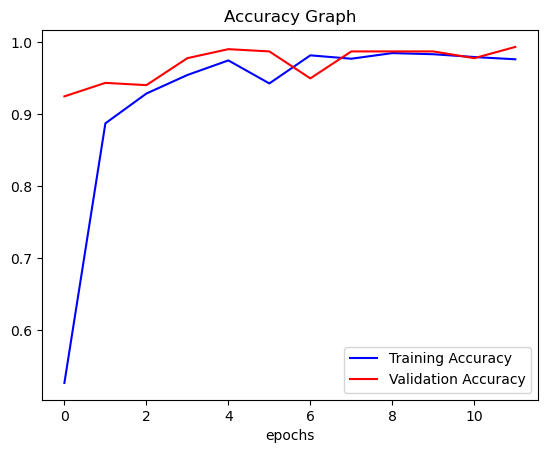

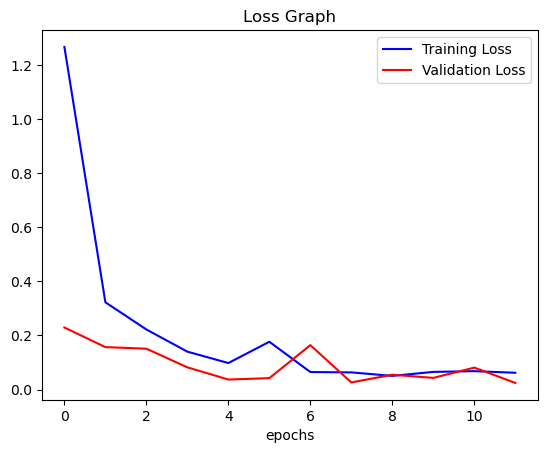

<Figure size 640x480 with 0 Axes>

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.xlabel('epochs')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('epochs')
plt.title('Loss Graph')
plt.legend()
plt.figure()

# 2. KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# # Load your dataset
# df = pd.read_csv('your_dataset.csv')

# # Split the data
X_train, x_test, Y_train, y_test = train_test_split(df['images'], df['label'], stratify=df['label'], test_size=0.2, random_state=42)

# Function to convert image to numpy array
def image_to_np_array(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))  # Resize if needed
    img_array = img.flatten()  # Flatten the image into a 1D array
    return img_array

# Convert images to numpy arrays for training and test data
X_train_features = np.array([image_to_np_array(img_path) for img_path in X_train])
x_test_features = np.array([image_to_np_array(img_path) for img_path in x_test])

# Define the parameter grid for k
# param_grid = {'n_neighbors': list(range(1,20,2))}

# Create a KNN classifier
knn_model = KNeighborsClassifier()

# Perform grid search with cross-validation
# grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_features, Y_train)

# Get the best parameters from the grid search
# best_k = grid_search.best_params_['n_neighbors']

# Train the final KNN model with the best k
# final_knn_model = KNeighborsClassifier(n_neighbors=best_k)
final_knn_model = KNeighborsClassifier(n_neighbors=1)
final_knn_model.fit(X_train_features, Y_train)

# Predict on the test set
y_pred = final_knn_model.predict(x_test_features)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
# print(f'Best k: {best_k}')
print(f'Accuracy: {accuracy}')


Accuracy: 0.996875


In [60]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

# Train the final KNN model with the best k
# final_knn_model = KNeighborsClassifier(n_neighbors=2)
# final_knn_model.fit(X_train_features, Y_train)

# Predict on the test set
y_pred = final_knn_model.predict(x_test_features)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Overall Accuracy: {accuracy:.4f}')

# Precision, Recall, and F1-Score for each class
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

# Confusion Matrix
confusion_mtx = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion_mtx)

# Precision and Recall for each class (Note: KNN does not directly provide probabilities, so precision, recall, and F1-score might be less meaningful)
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)

for i, label in enumerate(class_labels):
    print(f'Class {label}:')
    print(f'Precision: {precision_per_class[i]:.4f}')
    print(f'Recall: {recall_per_class[i]:.4f}')
    accuracy_per_class = precision_score(y_test, y_pred, average='micro', labels=[i])
    print(f'Accuracy: {accuracy_per_class:.4f}')
    print('---')


Overall Accuracy: 0.9969
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      0.97      0.99        40
           3       0.98      1.00      0.99        40
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        40

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

Confusion Matrix:
 [[40  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0]
 [ 0  0 39  1  0  0  0  0]
 [ 0  0  0 40  0  0  0  0]
 [ 0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0 40]]
Class 3:
Precision: 1.0000
Recall: 1.0000
Accuracy: 1.0000
---
C

# 3. SVM

In [61]:
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Split the data
X_train, x_test, Y_train, y_test = train_test_split(df['images'], df['label'], stratify=df['label'], test_size=0.2, random_state=42)

# Function to convert image to numpy array
def image_to_np_array(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))  # Resize if needed
    img_array = img.flatten()  # Flatten the image into a 1D array
    return img_array

# Convert images to numpy arrays for training and test data
X_train_features = np.array([image_to_np_array(img_path) for img_path in X_train])
x_test_features = np.array([image_to_np_array(img_path) for img_path in x_test])

# Define the parameter grid for SVM (C, gamma, and kernel parameters)
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly']}

# Create an SVM classifier
svm_model = SVC()

# Perform grid search with cross-validation
# grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_features, Y_train)

# Get the best parameters from the grid search
# best_params = grid_search.best_params_
# best_C = best_params['C']
# best_gamma = best_params['gamma']
# best_kernel = best_params['kernel']

# Train the final SVM model with the best parameters
# final_svm_model = SVC(C=best_C, gamma=best_gamma, kernel=best_kernel)
final_svm_model = SVC(C=0.1, gamma=0.01, kernel='linear')
final_svm_model.fit(X_train_features, Y_train)

# Predict on the test set
y_pred = final_svm_model.predict(x_test_features)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
# print(f'Best C: {best_C}')
# print(f'Best Gamma: {best_gamma}')
# print(f'Best Kernel: {best_kernel}')
print(f'Accuracy: {accuracy}')

Accuracy: 0.99375


In [62]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

# # Train the final KNN model with the best k
# final_knn_model = KNeighborsClassifier(n_neighbors=best_k)
# final_knn_model.fit(X_train_features, Y_train)

# # Predict on the test set
# y_pred = final_knn_model.predict(x_test_features)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Overall Accuracy: {accuracy:.4f}')

# Precision, Recall, and F1-Score for each class
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

# Confusion Matrix
confusion_mtx = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion_mtx)

# Precision and Recall for each class (Note: KNN does not directly provide probabilities, so precision, recall, and F1-score might be less meaningful)
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)

for i, label in enumerate(class_labels):
    print(f'Class {label}:')
    print(f'Precision: {precision_per_class[i]:.4f}')
    print(f'Recall: {recall_per_class[i]:.4f}')
    accuracy_per_class = precision_score(y_test, y_pred, average='micro', labels=[i])
    print(f'Accuracy: {accuracy_per_class:.4f}')
    print('---')


Overall Accuracy: 0.9938
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.98      1.00      0.99        40
           2       1.00      0.95      0.97        40
           3       1.00      1.00      1.00        40
           4       0.98      1.00      0.99        40
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        40

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

Confusion Matrix:
 [[40  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0]
 [ 0  1 38  0  1  0  0  0]
 [ 0  0  0 40  0  0  0  0]
 [ 0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0 40]]
Class 3:
Precision: 1.0000
Recall: 1.0000
Accuracy: 1.0000
---
C

# 4. Random Forest

In [63]:

import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Split the data
X_train, x_test, Y_train, y_test = train_test_split(df['images'], df['label'], stratify=df['label'], test_size=0.2, random_state=42)

# Function to convert image to numpy array
def image_to_np_array(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))  # Resize if needed
    img_array = img.flatten()  # Flatten the image into a 1D array
    return img_array

# Convert images to numpy arrays for training and test data
X_train_features = np.array([image_to_np_array(img_path) for img_path in X_train])
x_test_features = np.array([image_to_np_array(img_path) for img_path in x_test])

final_rf_model = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=2)
final_rf_model.fit(X_train_features, Y_train)

# Predict on the test set
y_pred = final_rf_model.predict(x_test_features)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
# print(f'Best n_estimators: {best_params["n_estimators"]}')
# print(f'Best max_depth: {best_params["max_depth"]}')
# print(f'Best min_samples_split: {best_params["min_samples_split"]}')
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [64]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

# # Train the final KNN model with the best k
# final_knn_model = KNeighborsClassifier(n_neighbors=best_k)
# final_knn_model.fit(X_train_features, Y_train)

# # Predict on the test set
# y_pred = final_knn_model.predict(x_test_features)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Overall Accuracy: {accuracy:.4f}')

# Precision, Recall, and F1-Score for each class
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

# Confusion Matrix
confusion_mtx = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion_mtx)

# Precision and Recall for each class (Note: KNN does not directly provide probabilities, so precision, recall, and F1-score might be less meaningful)
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)

for i, label in enumerate(class_labels):
    print(f'Class {label}:')
    print(f'Precision: {precision_per_class[i]:.4f}')
    print(f'Recall: {recall_per_class[i]:.4f}')
    accuracy_per_class = precision_score(y_test, y_pred, average='micro', labels=[i])
    print(f'Accuracy: {accuracy_per_class:.4f}')
    print('---')


Overall Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        40

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

Confusion Matrix:
 [[40  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0]
 [ 0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0 40]]
Class 3:
Precision: 1.0000
Recall: 1.0000
Accuracy: 1.0000
---
C

# 5. Naive Bayes

In [65]:
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Split the data
X_train, x_test, Y_train, y_test = train_test_split(df['images'], df['label'], stratify=df['label'], test_size=0.2, random_state=42)

# Function to convert image to numpy array
def image_to_np_array(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))  # Resize if needed
    img_array = img.flatten()  # Flatten the image into a 1D array
    return img_array

# Convert images to numpy arrays for training and test data
X_train_features = np.array([image_to_np_array(img_path) for img_path in X_train])
x_test_features = np.array([image_to_np_array(img_path) for img_path in x_test])

# Create a Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the Naive Bayes model
nb_model.fit(X_train_features, Y_train)

# Predict on the test set
y_pred = nb_model.predict(x_test_features)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.928125


In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

# # Train the final KNN model with the best k
# final_knn_model = KNeighborsClassifier(n_neighbors=best_k)
# final_knn_model.fit(X_train_features, Y_train)

# # Predict on the test set
# y_pred = final_knn_model.predict(x_test_features)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Overall Accuracy: {accuracy:.4f}')

# Precision, Recall, and F1-Score for each class
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

# Confusion Matrix
confusion_mtx = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion_mtx)

# Precision and Recall for each class (Note: KNN does not directly provide probabilities, so precision, recall, and F1-score might be less meaningful)
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)

for i, label in enumerate(class_labels):
    print(f'Class {label}:')
    print(f'Precision: {precision_per_class[i]:.4f}')
    print(f'Recall: {recall_per_class[i]:.4f}')
    accuracy_per_class = precision_score(y_test, y_pred, average='micro', labels=[i])
    print(f'Accuracy: {accuracy_per_class:.4f}')
    print('---')


Overall Accuracy: 0.9281
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       1.00      0.93      0.96        40
           2       0.78      1.00      0.88        40
           3       1.00      0.97      0.99        40
           4       1.00      0.75      0.86        40
           5       0.97      0.97      0.97        40
           6       1.00      0.97      0.99        40
           7       0.76      0.88      0.81        40

    accuracy                           0.93       320
   macro avg       0.94      0.93      0.93       320
weighted avg       0.94      0.93      0.93       320

Confusion Matrix:
 [[38  0  0  0  0  0  0  2]
 [ 0 37  1  0  0  1  0  1]
 [ 0  0 40  0  0  0  0  0]
 [ 0  0  1 39  0  0  0  0]
 [ 0  0  2  0 30  0  0  8]
 [ 0  0  1  0  0 39  0  0]
 [ 0  0  1  0  0  0 39  0]
 [ 0  0  5  0  0  0  0 35]]
Class 3:
Precision: 1.0000
Recall: 0.9500
Accuracy: 1.0000
---
C

# 6. Logistic Regression

In [67]:
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Split the data
X_train, x_test, Y_train, y_test = train_test_split(df['images'], df['label'], stratify=df['label'], test_size=0.2, random_state=42)

# Function to convert image to numpy array
def image_to_np_array(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))  # Resize if needed
    img_array = img.flatten()  # Flatten the image into a 1D array
    return img_array

# Convert images to numpy arrays for training and test data
X_train_features = np.array([image_to_np_array(img_path) for img_path in X_train])
x_test_features = np.array([image_to_np_array(img_path) for img_path in x_test])

# Create a Logistic Regression classifier
lr_model = LogisticRegression()

# Train the Logistic Regression model
lr_model.fit(X_train_features, Y_train)

# Predict on the test set
y_pred = lr_model.predict(x_test_features)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.99375


In [68]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

# # Train the final KNN model with the best k
# final_knn_model = KNeighborsClassifier(n_neighbors=best_k)
# final_knn_model.fit(X_train_features, Y_train)

# # Predict on the test set
# y_pred = final_knn_model.predict(x_test_features)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Overall Accuracy: {accuracy:.4f}')

# Precision, Recall, and F1-Score for each class
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

# Confusion Matrix
confusion_mtx = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion_mtx)

# Precision and Recall for each class (Note: KNN does not directly provide probabilities, so precision, recall, and F1-score might be less meaningful)
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)

for i, label in enumerate(class_labels):
    print(f'Class {label}:')
    print(f'Precision: {precision_per_class[i]:.4f}')
    print(f'Recall: {recall_per_class[i]:.4f}')
    accuracy_per_class = precision_score(y_test, y_pred, average='micro', labels=[i])
    print(f'Accuracy: {accuracy_per_class:.4f}')
    print('---')


Overall Accuracy: 0.9938
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.97      0.99        40
           2       1.00      0.97      0.99        40
           3       1.00      1.00      1.00        40
           4       0.98      1.00      0.99        40
           5       0.98      1.00      0.99        40
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        40

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

Confusion Matrix:
 [[40  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  1  0  0]
 [ 0  0 39  0  1  0  0  0]
 [ 0  0  0 40  0  0  0  0]
 [ 0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0 40]]
Class 3:
Precision: 1.0000
Recall: 1.0000
Accuracy: 1.0000
---
C